In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
dataset_path = '/Users/inigoparra/Desktop/merged.csv'
column_name = 'text'

df = pd.read_csv(dataset_path)
data = df[column_name].tolist()

In [4]:
def preprocess(sentence):

    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', '', sentence)
    return sentence.strip()

data = [preprocess(sentence) for sentence in data]
print(data[:5])


['min molestia txiki ta normalaaho txikiakin esango detbao igual orain bai', 'lesbiana eta gay bikoteak naturaren kontra doaz ez lukete guraso izan beharko aldiz semearen esperma hartu obulo bat bilatu eta emakume bat inseminatzea norbere bakardade eta arazo psikologikoak gainditu ahal izateko oso normala da', 'lehengoan entzun nion assumpta ayerdiri eta begira etorri zait arazorik gabeko gizon zuriak munduko a da hori ez da normala normala bestea dapixka bat aldatu dut baina hori da', 'janaritan gastatzen deten diru dana ez da normala', 'bai askok irentsi genuen hasieran ezker abertzale ofizialaren estrategia aldaketaren amua normala danormala ez dena da hainbeste urteren ostean errealitatea ez onartzea hau da ezker abertzale ofizialak borroka alboratu zuela kargu batzuen truke asumitu garaia da eta']


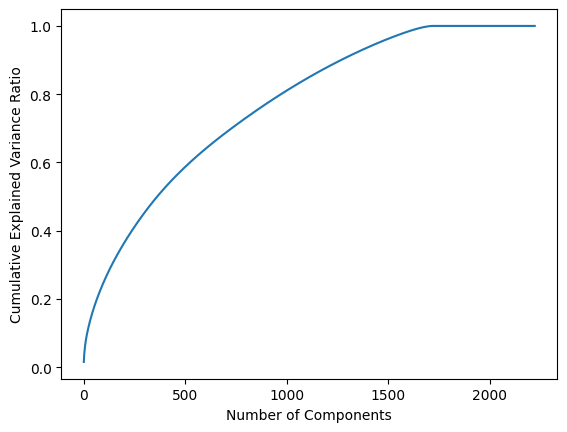

In [5]:
# Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

# Apply PCA without reducing dimensions
pca_full = PCA()
X_full_pca = pca_full.fit_transform(X.toarray())

# Calculate cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [20]:
# Dimensionality Reduction
pca = PCA(n_components=1500)
X_pca = pca.fit_transform(X.toarray())

In [21]:
# Clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Assigning sentiment labels
sentiments = ['positive', 'negative', 'neutral']
clusters = kmeans.predict(X_pca)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Analyze the clusters and assign sentiment labels
# This part should be done manually or using a Basque sentiment lexicon
cluster_sentiment = {
    2: 'positive',
    0: 'negative',
    1: 'neutral'
}

sentiment_labels = [cluster_sentiment[cluster] for cluster in clusters]

In [23]:
# Model Evaluation
# If you have a labeled dataset, calculate accuracy, precision, recall, or F1 score
# If not, use silhouette_score or other internal evaluation metrics
sil_score = silhouette_score(X_pca, clusters)

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.009448713305373078


In [19]:
# Save the results to a CSV file
results = pd.DataFrame({'sentence': data, 'sentiment': sentiment_labels})
results.to_csv('basque_sentiment_results.csv', index=False, encoding='utf-8')